<a href="https://colab.research.google.com/github/lauraemmanuella/AprendizadoMaquina/blob/main/7_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina

/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina


# Métodos baseados em otimização

Algumas técnicas de AM realizam a construção do estimador recorrendo à otimização de alguma função. Nesse processo, um problema de aprendizado é formulado como um problema de otimização em que o objetivo consiste em minimizar (ou maximizar) uma função objetivo.

Duas técnicas comuns de AM baseada em otimização são as **redes neurais artificiais e as máquinas de vetores de suporte**.


## Support Vector Machines - SVM


É um método de AM supervisionado usado para **classificação e regressão**, onde dado uma base de dados para treino do modelo, o SVM encontrará uma equação que define uma fronteira (**hiperplano**) capaz de separar os dados nas classes disponíveis (em problemas de classificação), ou encontrará uma equação capaz de mapear os dados de entrada nas saídas esperadas para problemas preditivos (regressão).


Ver:

https://www.learnopencv.com/support-vector-machines-svm/

https://www.learnopencv.com/svm-using-scikit-learn-in-python/

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

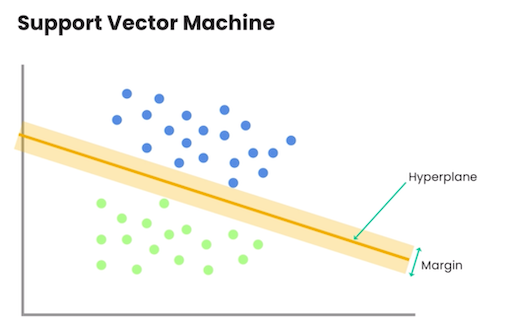

In [4]:
from IPython.display import Image
Image('./img/svmclassifier.png')

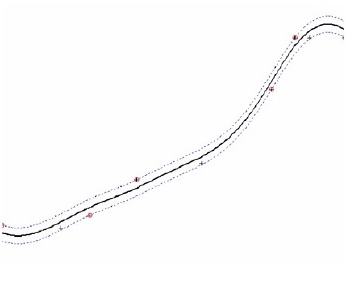

In [ ]:
Image('./img/svmregressor.jpg')

A ideia por trás do SVM é **criar limites de separação entre as classes, através de hiperplanos, onde os hiperplanos tenham a maior distância possível para os exemplos mais próximos de cada classe**

* As retas que passam pelos pontos mais externos de cada classe são chamados de **vetores de suporte**
* A distância entre os vetores de suporte é chamada de **margem**
* O **hiperplano** gerado pelo SVM deverá estar no meio dessa margem

Em caso de regressão, a margem também será maximizada, **evitando que o modelo fique superajustado aos dados de treino**


**Observe na imagem abaixo que existem muitas possibilidades de retas que separam as classes, no entanto o SVM busca encontrar a melhor reta de modo a maximizar a margem de separação das classes, por isso é chamado de modelo de otimização.**

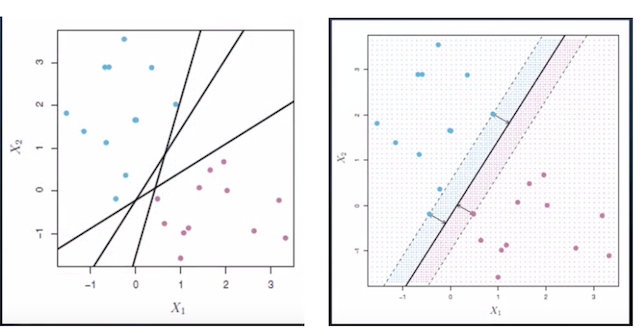

In [ ]:
Image('./img/escolhahiperplano.png')

## SVM em dados não linearmente separáveis

https://www.youtube.com/watch?v=3liCbRZPrZA&t=42s

Para encontrar um hiperplano em dados que não são linearmente separáveis, o SVM usa uma estratégia chamada de **truque do kernel**

Nessa estratégia, ele aplica uma função não linear aos dados levando-os para um espaço dimensional superior onde ele possa encontrar um hiperplano de separação e depois trás de volta aplicando a inversa

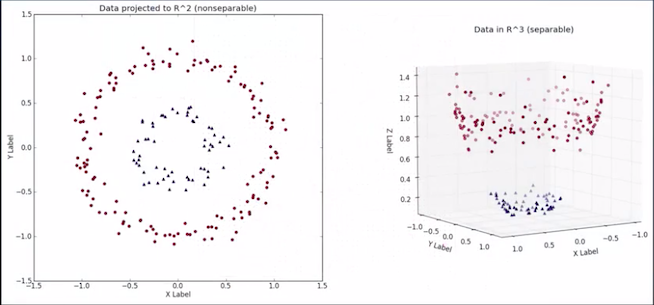

In [ ]:
Image('./img/svmnaolinear.png')

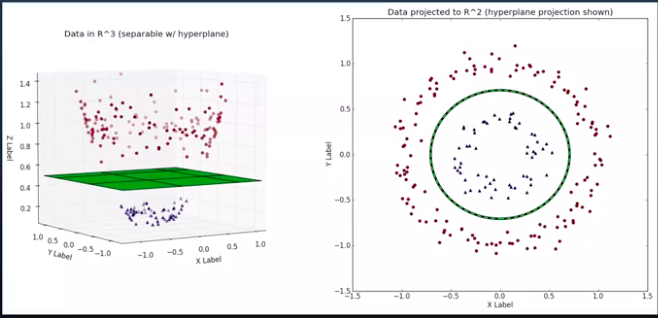

In [ ]:
Image('./img/svmnaolinear2.png')

## Margem rígida e Margem suave

Chamamos de classificação de margem rígida, quando impomos a restrição de que todas as instâncias estejam fora da margem de separação, ou seja, não permitimos exemplos dentro da margem ou do lado errado

Essa restrição só é possível para problemas linearmente separáveis e é bastante sensível a outliers

A classificação de margem suave permite algumas instâncias dentro da margem ou do lado errado, mas busca encontrar o equilíbrio entre manter a margem o mais larga possível e limitar as violações de margem (instâncias no meio da margem ou da lado errado)

Observe que quanto maior a margem, mais violações serão permitidas, quanto menor, menos violações, no entanto, quanto menor a margem, maior a tendência à overfitting, ou seja, um classificador muito ajustado aos dados de treino, o que pode dificultar a generalização em problemas desconhecidos

O Hiperparâmetro que controla a largura da margem é o C. Quanto maior o C, menor a largura da margem.

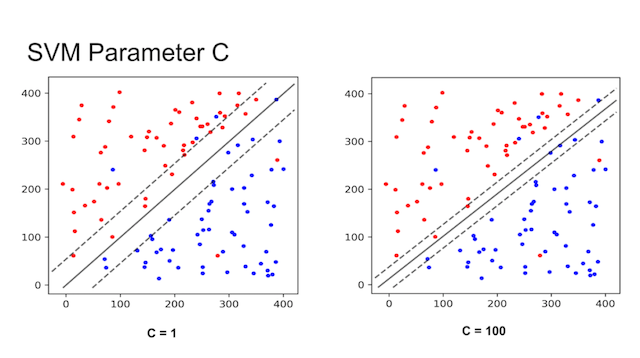

In [5]:
Image('./img/parametroc.png')

## Parâmetros ajustáveis

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769

* **Kernel**: É a função a ser aplicada para obtenção do hiperplano, opções: linear, gaussiano (rbf), polinomial (poly), sigmoid
* **C**: Quando os dados de treino são ruidosos, pode-se permitir que alguns exemplos fiquem dentro da margem de separação, o que acarretará um erro durante o treinamento do modelo. O parâmetro C tenta ajustar a maximização da margem que separa as classes, minimizando o erro de treinamento. Intervalor comum para C: 1 a 100. Quando maior, menor a margem de separação.
* **Gama**: Quando o SVM é aplicado a problemas não linearmente separáveis, deve-se definir o alongamento da nova dimensão criada. Intervalo entre 0 e 1, sendo 1 propenso a overfitting, valor indicado 0.1

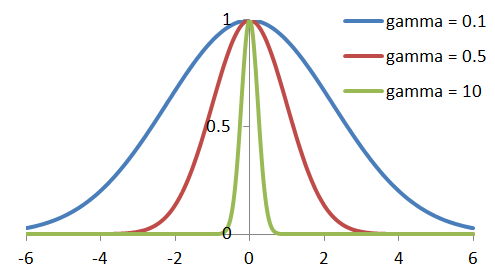

In [6]:
Image('./img/gaussian_curves.png')

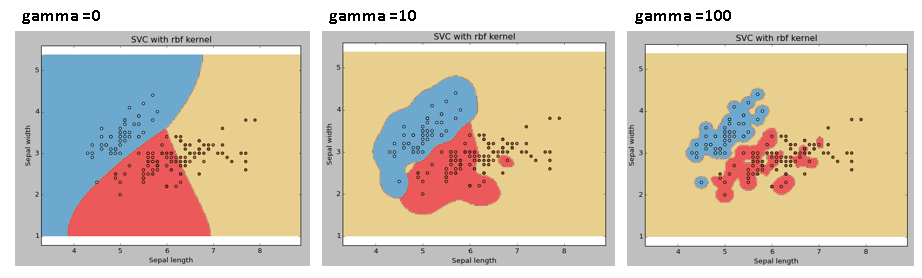

In [7]:
Image('./img/gamma.png')

## Classificação multirótulos

https://www.baeldung.com/cs/svm-multiclass-classification

O SVM oferece suporte à classificação binária e à separação de pontos de dados em duas classes. Para classificação multiclasse, o mesmo princípio é utilizado depois de decompor o problema de multiclassificação em vários problemas binários de classificação.

Isso pode ser feito com a abordagem de um contra um, onde é definido um classificador binário para cada par de classes, ou com a abordagem um contra o resto, onde é definido um classificador para cada classe, separando-a ao mesmo tempo de todas as outras.

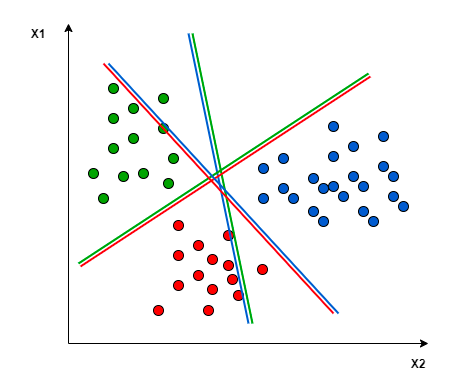

In [8]:
Image('./img/one-vs-one.png')

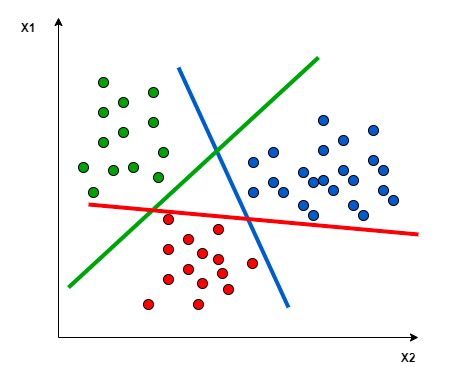

In [9]:
Image('./img/one-vs-rest.png')

## Vantagens

Estimadores SVM oferecem boa precisão e executam previsão mais rápida em comparação com o algoritmo Naive Bayes. Eles também usam menos memória porque usam um subconjunto de pontos de treinamento na fase de decisão. O SVM funciona bem com uma margem de separação clara e com alto espaço dimensional (quantidade de atributos).

## Desvantagens

O SVM não é adequado para grandes conjuntos de dados (quantidade de exemplos) devido ao seu alto tempo de treinamento e também leva mais tempo no treinamento em comparação com os Naive Bayes. Ele funciona mal com classes sobrepostas e também é sensível ao tipo de kernel usado, bem como os demais parâmetros apresentados (precisa ser feito o fine tunning, ou seja, o processo de detecção dos melhores parâmetros para cada problema)

## SVM no sklearn


In [10]:
import pandas as pd
import numpy as np

In [11]:
dfIris = pd.read_csv('./bases/iris.csv')

In [12]:
#Vamos fazer a mudança de tipo da coluna alvo usando LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dfIris['class'] = le.fit_transform(dfIris['class']) #ajusta a função aos dados

In [35]:
#dividindo a base para um teste simples por enquanto
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfIris.drop(columns=['class']), dfIris['class'],test_size=0.33, stratify=dfIris['class'])

### Escolha dos melhores parâmetros usando GridSearchCV

In [28]:
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.1, 0.01, 0.001, 'auto', 'scale'], 
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
} 

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid = GridSearchCV(SVC(),param_grid, verbose = 1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 'auto', 'scale'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [37]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [38]:
from sklearn import metrics

pred = grid.predict(X_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [39]:
dfGridSearch = pd.DataFrame(grid.cv_results_)

In [40]:
dfGridSearch.loc[dfGridSearch['rank_test_score'] == 1, :]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.001649,0.000040,0.001129,0.000106,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",1.0,0.95,0.95,1.0,0.95,0.97,0.024495,1
23,0.001650,0.000349,0.001092,0.000244,1,0.1,linear,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",1.0,0.95,0.95,1.0,0.95,0.97,0.024495,1
27,0.001325,0.000020,0.000807,0.000020,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",1.0,0.95,0.95,1.0,0.95,0.97,0.024495,1
31,0.001429,0.000132,0.000841,0.000025,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",1.0,0.95,0.95,1.0,0.95,0.97,0.024495,1
35,0.001549,0.000220,0.000997,0.000143,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",1.0,0.95,0.95,1.0,0.95,0.97,0.024495,1
39,0.001397,0.000044,0.000795,0.000017,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",1.0,0.95,0.95,1.0,0.95,0.97,0.024495,1
56,0.001568,0.000157,0.000847,0.000023,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",1.0,0.95,0.95,1.0,0.95,0.97,0.024495,1
65,0.001403,0.000022,0.000815,0.000012,100,0.01,poly,"{'C': 100, 'gamma': 0.01, 'kernel': 'poly'}",1.0,0.95,0.95,1.0,0.95,0.97,0.024495,1
